In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
import seaborn as sns
import statsmodels.api as sm

In [93]:
# Import insurance datasets
ins_df = pd.read_csv('insurance.csv')
ins_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [94]:
# Checking for any missing values 
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [95]:
ins_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Axes: xlabel='region', ylabel='charges'>

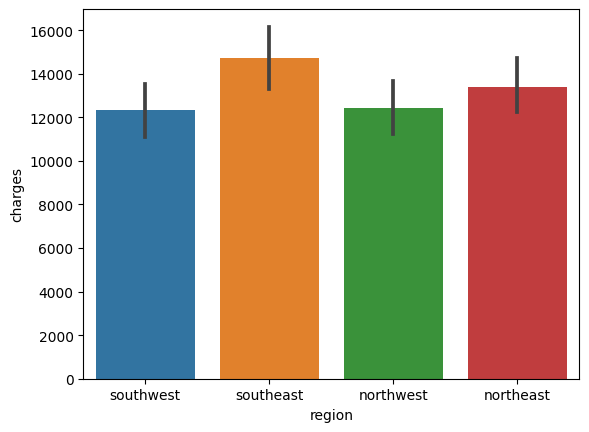

In [97]:
sns.barplot(x = ins_df['region'],y = ins_df['charges'])

In [98]:
# Converting categorical value with one-hot encoding
ins_df = pd.get_dummies(ins_df,drop_first=True)
ins_df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [90]:
# Converting categorical values to numerical
# categorical_values = ['sex','smoker','region']
# def cat_to_num(df,values):
#     for i in values:
#         df[i] = df[i].astype('category')
#         df[i] = df[i].cat.codes
# cat_to_num(ins_df,categorical_values)
# ins_df

In [99]:
ins_df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

<Axes: >

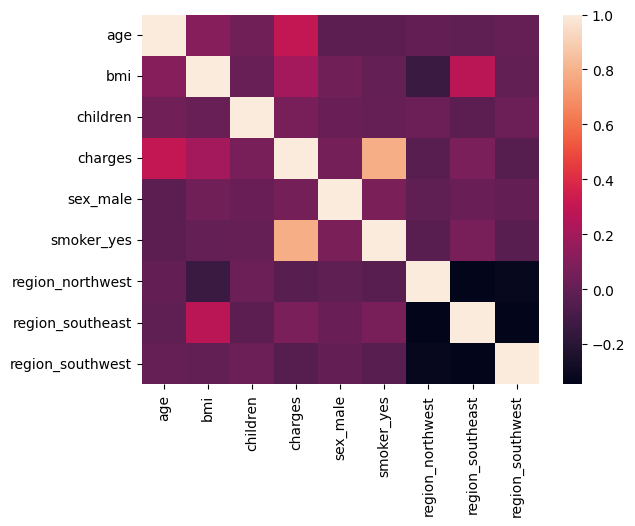

In [100]:
corr = ins_df.corr()
sns.heatmap(corr)

In [101]:
x = ins_df.drop(columns='charges')
y = ins_df['charges']
print(x.shape)
print(y.shape)

(1338, 8)
(1338,)


In [102]:
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.7,random_state=42)

In [103]:
lm = LinearRegression()
lm

LinearRegression()

In [104]:
lm.fit(train_x,train_y)

LinearRegression()

In [105]:
lm.coef_

array([  261.29692414,   348.90691516,   424.11912829,   104.81182299,
       23628.36722236,  -486.93461047,  -970.96883857,  -926.32290791])

In [106]:
lm.intercept_

-12373.963903035485

In [107]:
pred_y = lm.predict(test_x)

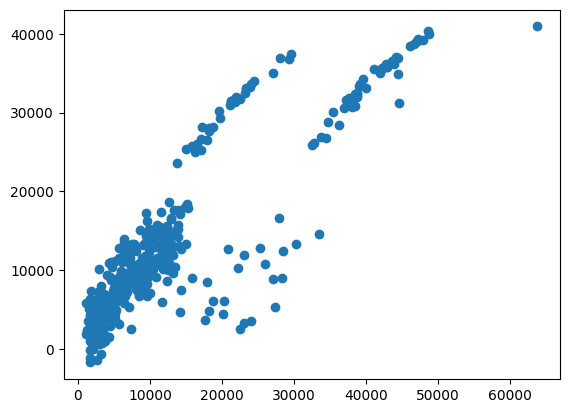

In [108]:
plt.scatter(test_y,pred_y)

In [109]:
print("R2 Score : {}".format(np.abs(r2_score(test_y,pred_y))))

R2 Score : 0.7696118054369011


In [110]:
x = ins_df.drop(columns='charges')
y = ins_df['charges']

In [111]:
X = sm.add_constant(x)
train_x,test_x,train_y,test_y = train_test_split(X,y,train_size=0.7,random_state=42)

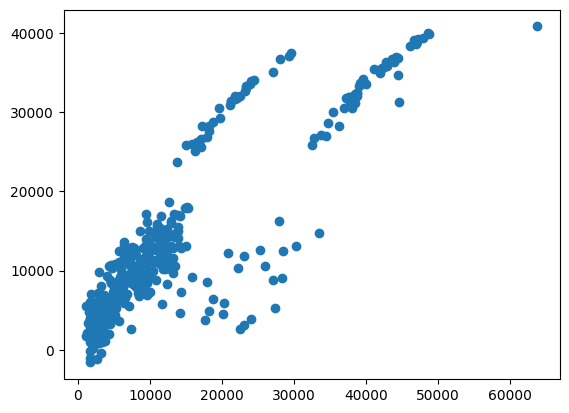

In [112]:
lm2 = sm.OLS(y,X).fit()
pred_y2 = lm2.predict(test_x)
plt.scatter(test_y,pred_y2)

In [114]:
print("Adjusted R2 score : {}".format(lm2.rsquared_adj))

Adjusted R2 score : 0.7494136397729286
